# CS3802--Machine Learning Algorithms Lab

Adithya V |
BTech CSE (IoT) - A | 21011102009

## Exercise 8
---
Download MNIST dataset, apply PCA from scratch.  




### Importing necessary libraries and reading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv',)
print("the shape of data is :", df.shape)
df.head()

the shape of data is : (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extracting label column from the dataset

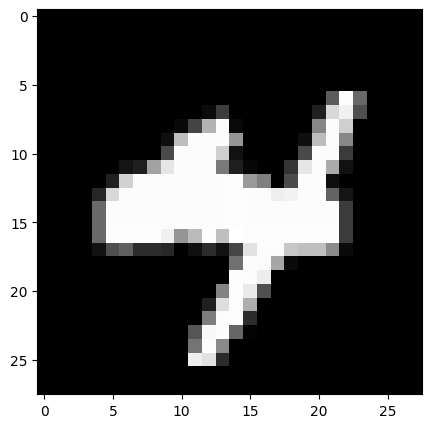

4


In [4]:
label = df['label']
df.drop('label', axis = 1, inplace = True)
ind = np.random.randint(0, 20000)
plt.figure(figsize = (20, 5))
grid_data = np.array(df.iloc[ind]).reshape(28,28)
plt.imshow(grid_data, interpolation = None, cmap = 'gray')
plt.show()
print(label[ind])

### Column standardization 

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_df = scaler.fit_transform(df)
std_df.shape

(42000, 784)

### Covariance

In [6]:
covar_mat = np.matmul(std_df.T, std_df)
covar_mat.shape

(784, 784)

### Converting the eigenvectors into (2,d) form for easiness of further computations

In [7]:
from scipy.linalg import eigh
values, vectors = eigh(covar_mat, eigvals = (782, 783))
print("Dimensions of Eigen vector:", vectors.shape)
vectors = vectors.T
print("Dimensions of Eigen vector:", vectors.shape)

C:\Users\ADITHYA VEDHAMANI\AppData\Local\Temp\ipykernel_14872\2763939472.py:2: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(covar_mat, eigvals = (782, 783))


Dimensions of Eigen vector: (784, 2)
Dimensions of Eigen vector: (2, 784)


In [9]:
final_df = np.matmul(vectors, std_df.T)
print("vectors:", vectors.shape, "n", "std_df:", std_df.T.shape, "n", "final_df:", final_df.shape)

vectors: (2, 784) n std_df: (784, 42000) n final_df: (2, 42000)


In [10]:
final_dfT = np.vstack((final_df, label)).T
dataFrame = pd.DataFrame(final_dfT, columns = ['pca_1', 'pca_2', 'label'])
dataFrame


,pca_1,pca_2,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0
...,...,...,...
41995,-1.350366,13.678849,0.0
41996,-1.187360,-8.869582,1.0
41997,7.076277,0.495391,7.0
41998,-4.344513,2.307240,6.0


### Visualization

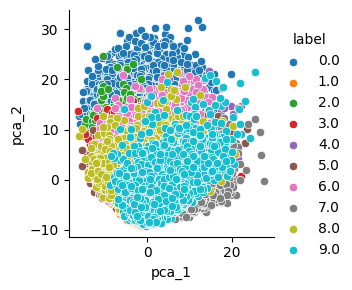

In [13]:
sns.FacetGrid(dataFrame, hue = 'label').map(sns.scatterplot, 'pca_1', 'pca_2').add_legend()
plt.show()